In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ForwardStarts as fs
from matplotlib import cm
import warnings

warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

In [2]:
S0 = 100
T1 = 0.7
T2 = 1.2
vol = 0.18417
r = 0.05
q = 0.02
alpha = 1

print(fs.forward_starts_call(S0, r, q, vol, T1, T2, alpha))

num_sims = 2**20-1
print(num_sims)

5.7908610740038755
1048575


Text(0, 0.5, 'Diff Fwd vol')

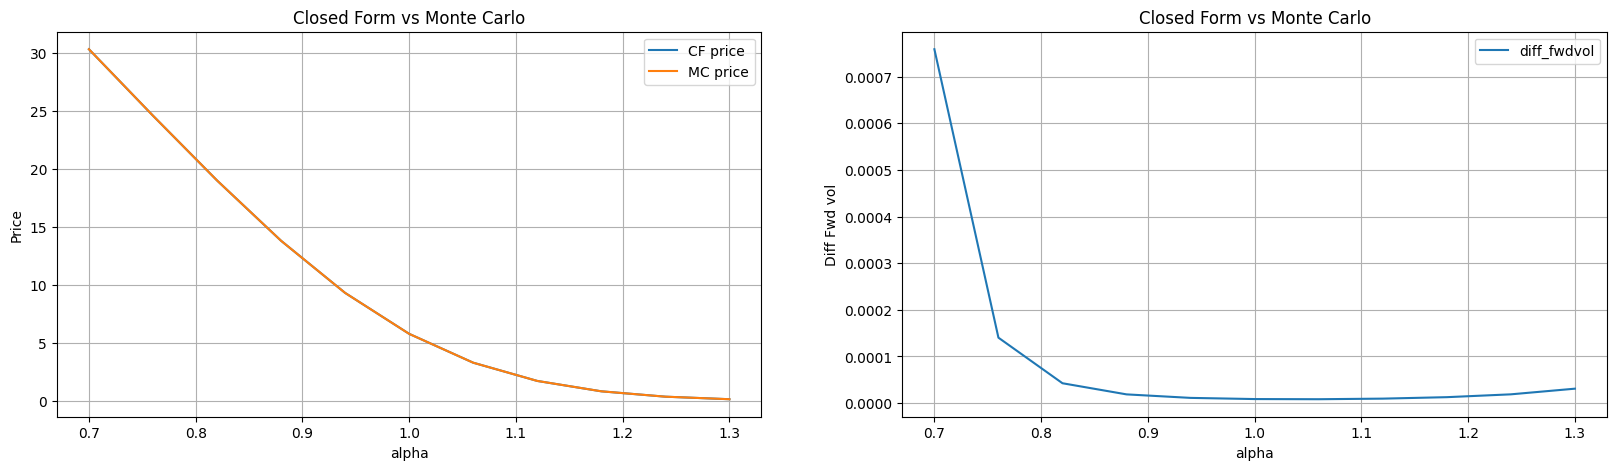

In [3]:
alphas = np.linspace(0.7, 1.3, 11)

cf_ps = [fs.forward_starts_call(S0, r, q, vol, T1, T2, alpha) for alpha in alphas]
cf_fwdvol = [fs.blackFwdiVol(S0, r, q, T1, T2, alpha, p) for alpha, p in zip(alphas, cf_ps)]

mc_ps = [fs.forward_starts_call_MC(S0, r, q, vol, T1, T2, alpha, num_sims) for alpha in alphas]
mc_fwdvol = [fs.blackFwdiVol(S0, r, q, T1, T2, alpha, p) for alpha, p in zip(alphas, mc_ps)]

diff_p = [(cf - mc)/cf for cf, mc in zip(cf_ps, mc_ps)]
diff_fwdvol = [(cf - mc)/cf for cf, mc in zip(cf_fwdvol, mc_fwdvol)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

output = np.array([alphas, cf_ps, mc_ps])
output = np.transpose(output)
df = pd.DataFrame(output, columns=['alpha', 'CF price', 'MC price'])
df = df.set_index('alpha')
df.plot(ax=axes[0], grid=True)

output2 = np.array([alphas, diff_fwdvol])
output2 = np.transpose(output2)
df2 = pd.DataFrame(output2, columns=['alpha', 'diff_fwdvol'])
df2 = df2.set_index('alpha')
df2.plot(ax=axes[1], grid=True)

axes[0].set_title('Closed Form vs Monte Carlo')
axes[0].set_ylabel('Price')
axes[1].set_title('Closed Form vs Monte Carlo')
axes[1].set_ylabel('Diff Fwd vol')

In [4]:
mc_fwdvol

[0.1840302332809496,
 0.18414416186309784,
 0.18416216449770395,
 0.18416656128326025,
 0.18416794793692856,
 0.18416841104644296,
 0.1841684745093025,
 0.18416824176975016,
 0.18416766374601318,
 0.1841665442018584,
 0.18416431081582957]

In [5]:
mc_fwdvol

[0.1840302332809496,
 0.18414416186309784,
 0.18416216449770395,
 0.18416656128326025,
 0.18416794793692856,
 0.18416841104644296,
 0.1841684745093025,
 0.18416824176975016,
 0.18416766374601318,
 0.1841665442018584,
 0.18416431081582957]